## Import Dependencies

In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

import warnings  
warnings.filterwarnings('ignore')

%matplotlib inline

# Load the Data

In [2]:
# Create Path
df_path = Path('../Resources/ny_data_cleanest.csv')

In [3]:
# Read in csv
df = pd.read_csv(df_path)
df

,Unnamed: 0,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,30149,3.0,1.0,60.00,Berlin,New York,12022.0,1176.0,175000.0
1,54248,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,425000.0
2,54258,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,225000.0
3,54259,3.0,3.0,1.90,Copake,New York,12516.0,1800.0,419000.0
4,54262,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,365000.0
...,...,...,...,...,...,...,...,...,...
75506,1104657,3.0,2.0,0.17,Rockville Centre,New York,11570.0,1583.0,739000.0
75507,1104658,3.0,3.0,0.23,Massapequa,New York,11758.0,1840.0,890000.0
75508,1104660,4.0,3.0,0.14,East Meadow,New York,11554.0,1597.0,599000.0
75509,1104661,2.0,2.0,0.06,New York City,New York,11414.0,862.0,765000.0


In [4]:
# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  75511 non-null  int64  
 1   bed         75511 non-null  float64
 2   bath        75511 non-null  float64
 3   acre_lot    75511 non-null  float64
 4   city        75511 non-null  object 
 5   state       75511 non-null  object 
 6   zip_code    75511 non-null  float64
 7   house_size  75511 non-null  float64
 8   price       75511 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 5.2+ MB


In [5]:
# Look for unique values
for value in df:
    print('For {},{} unique values present'.format(value,df[value].nunique()))

For Unnamed: 0,75511 unique values present
For bed,4 unique values present
For bath,4 unique values present
For acre_lot,667 unique values present
For city,498 unique values present
For state,1 unique values present
For zip_code,564 unique values present
For house_size,2295 unique values present
For price,1611 unique values present


In [6]:
# Drop columns that are not required
df = df.drop(["Unnamed: 0", "city", "state"], axis = 1,)
df.head()

,bed,bath,acre_lot,zip_code,house_size,price
0,3.0,1.0,60.00,12022.0,1176.0,175000.0
1,3.0,2.0,2.02,12521.0,1600.0,425000.0
2,4.0,2.0,0.24,12521.0,1239.0,225000.0
3,3.0,3.0,1.90,12516.0,1800.0,419000.0
4,3.0,2.0,2.00,12517.0,1482.0,365000.0


<Figure size 1000x600 with 0 Axes>

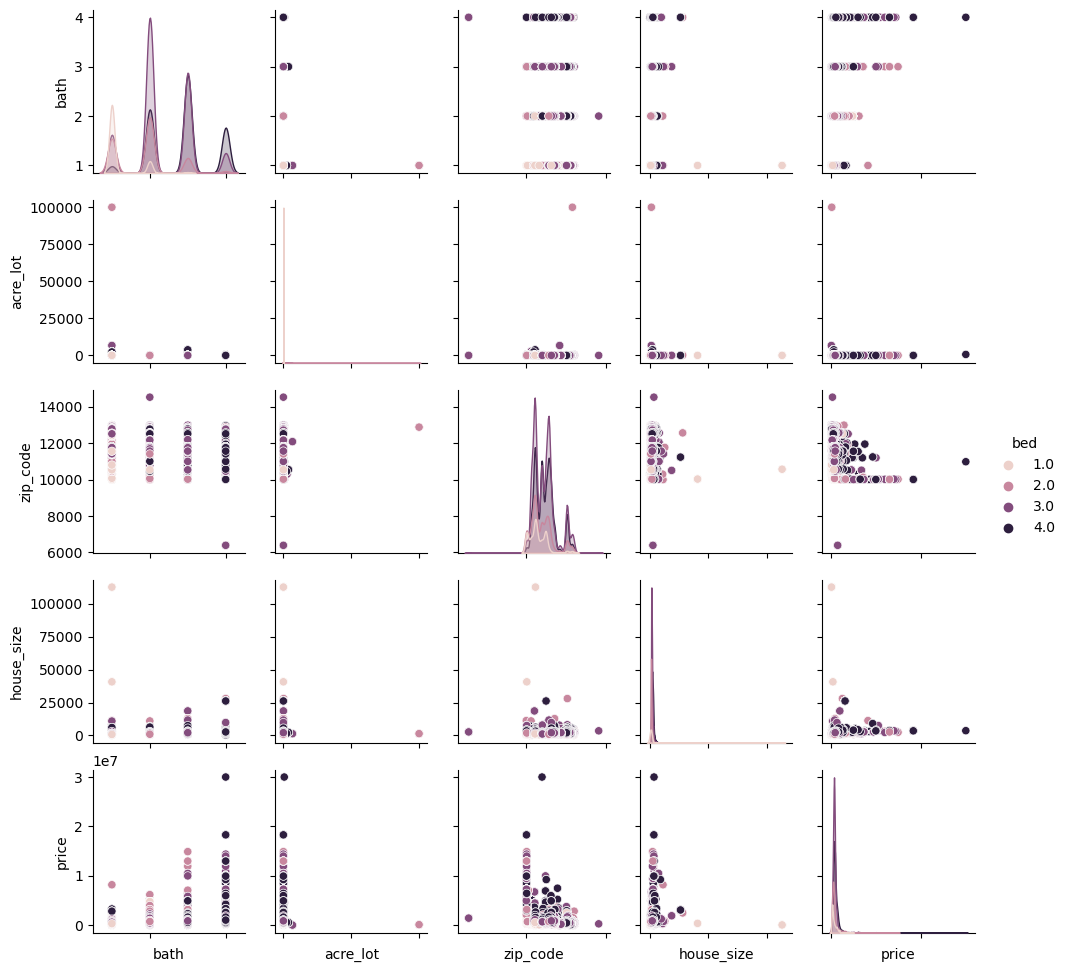

In [7]:
# Visualize data using Seaborn
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(df[['bed','bath','acre_lot','zip_code','house_size', 'price']]
                 ,hue='bed',size=2)
g.set(xticklabels=[])

<Axes: >

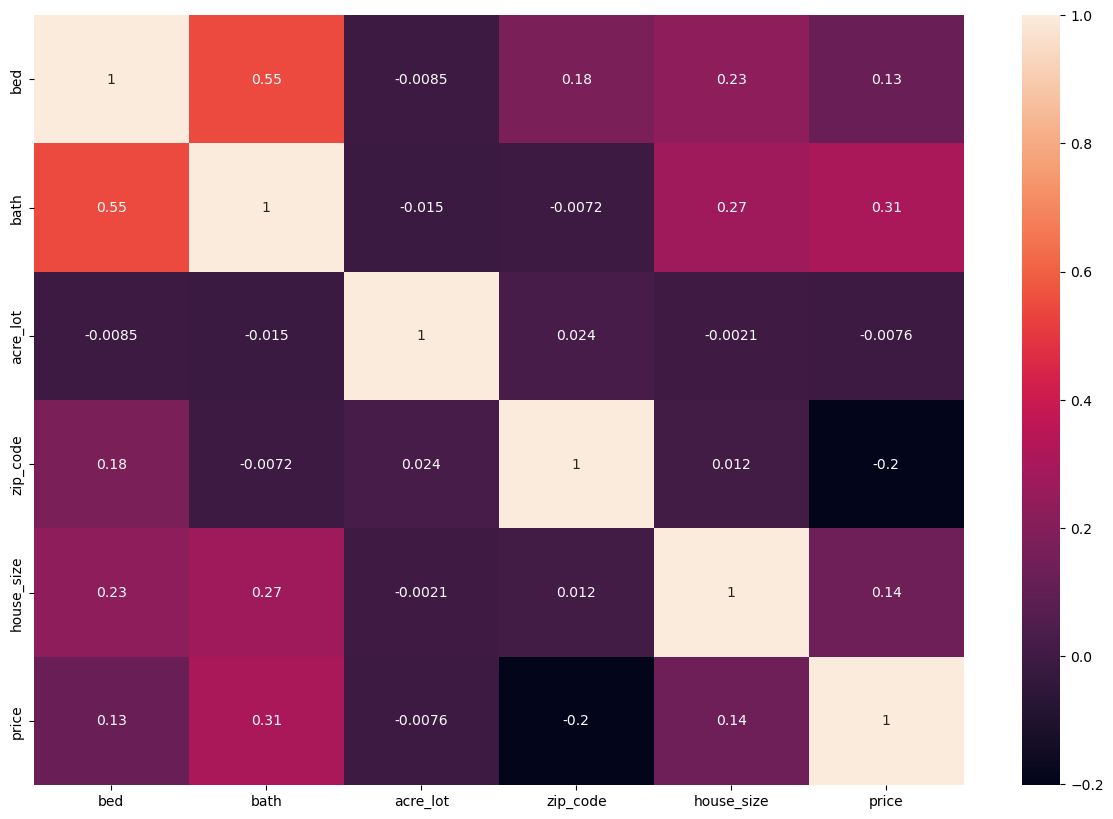

In [8]:
# Use a heatmap to Plot the co relation between variables
plt.figure(figsize=(15,10))
columns =['bed','bath','acre_lot','zip_code','house_size', 'price']
sns.heatmap(df[columns].corr(),annot=True)

## Explore the different model types

In [12]:
# Define the features set
X = df.copy()
X.drop("price", axis = 1, inplace = True)
X.head()

,bed,bath,acre_lot,zip_code,house_size
0,3.0,1.0,60.00,12022.0,1176.0
1,3.0,2.0,2.02,12521.0,1600.0
2,4.0,2.0,0.24,12521.0,1239.0
3,3.0,3.0,1.90,12516.0,1800.0
4,3.0,2.0,2.00,12517.0,1482.0


In [13]:
# Define the target vector
y = df["price"]
y.value_counts()

699000.0     1430
799000.0     1417
599000.0     1347
649000.0      936
899000.0      921
             ... 
425999.0        1
1335000.0       1
384990.0        1
997095.0        1
779999.0        1
Name: price, Length: 1611, dtype: int64

In [14]:
# Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2, random_state = 78)

In [15]:
# First try multiple linear regression
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [16]:
# Next try Decision Tree
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [17]:
# Next try the Random Forest Regression Model
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

## Score the different models

In [18]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Plot as a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  14
Decision tree  Regression Model Score is  99
Random Forest Regression Model Score is  99


,Model,Score,Explained Variance Score
1,Decision Tree,0.990320,0.990319
2,Random forest Regression,0.987914,0.987700
0,Multiple Linear Regression,0.135939,-4.720677
